In [1]:
import sys
import os

# Add project root to sys.path so src is importable
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)


In [2]:
import pandas as pd
from src.regime_analysis import (
    regime_statistics,
    simple_regime_backtest,
    plot_regimes,
    plot_regime_statistics,
    plot_strategy_vs_market
)


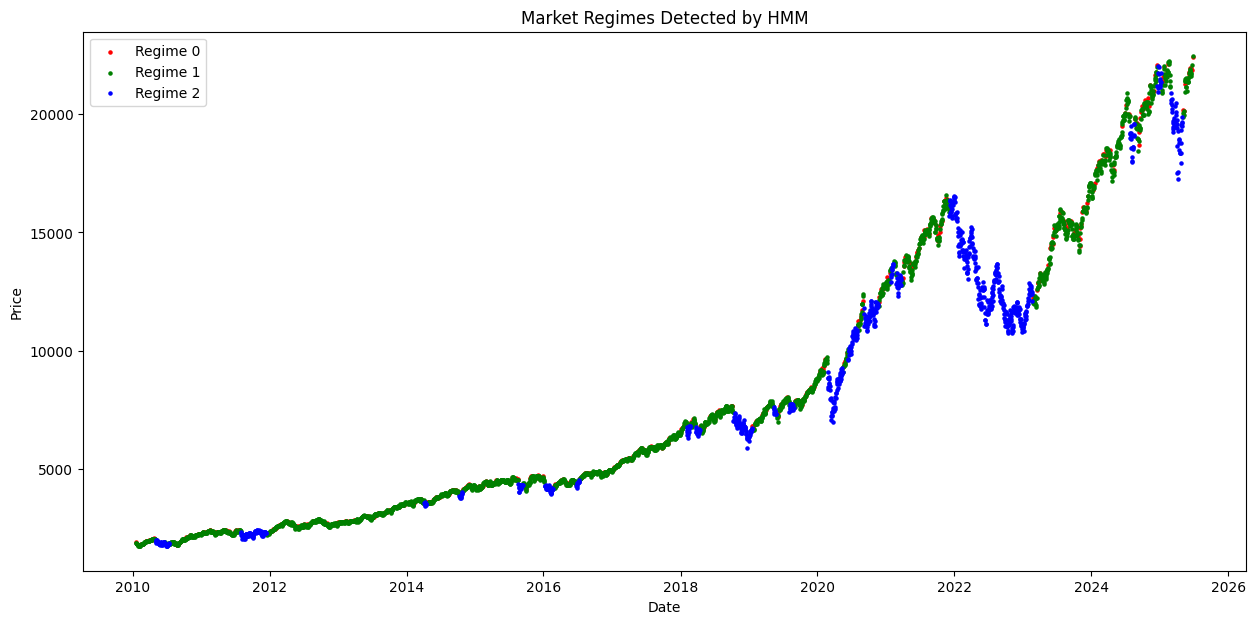

   Regime  Mean Return  Volatility  Sharpe Ratio  Max Drawdown  \
0       0     0.010040    0.006278      1.599201     -0.259340   
1       1    -0.001279    0.008111     -0.157677     -0.285656   
2       2    -0.000692    0.021798     -0.031745     -0.352174   

   Duration (days)  
0              642  
1             2344  
2              897  


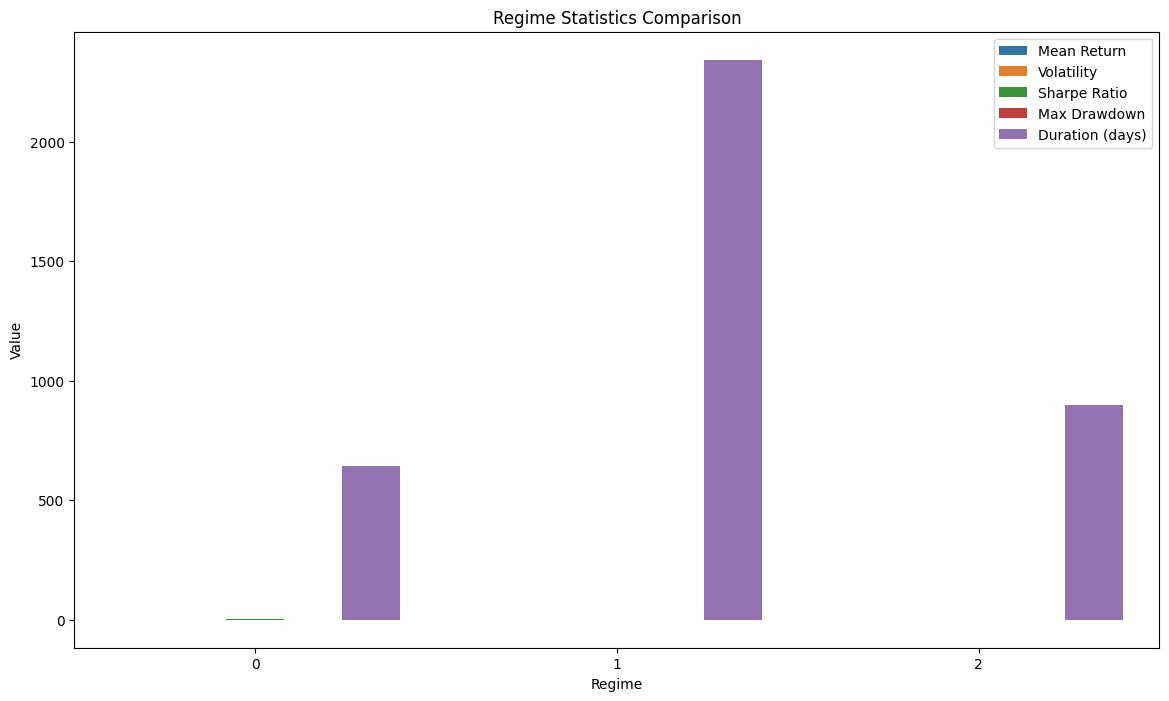

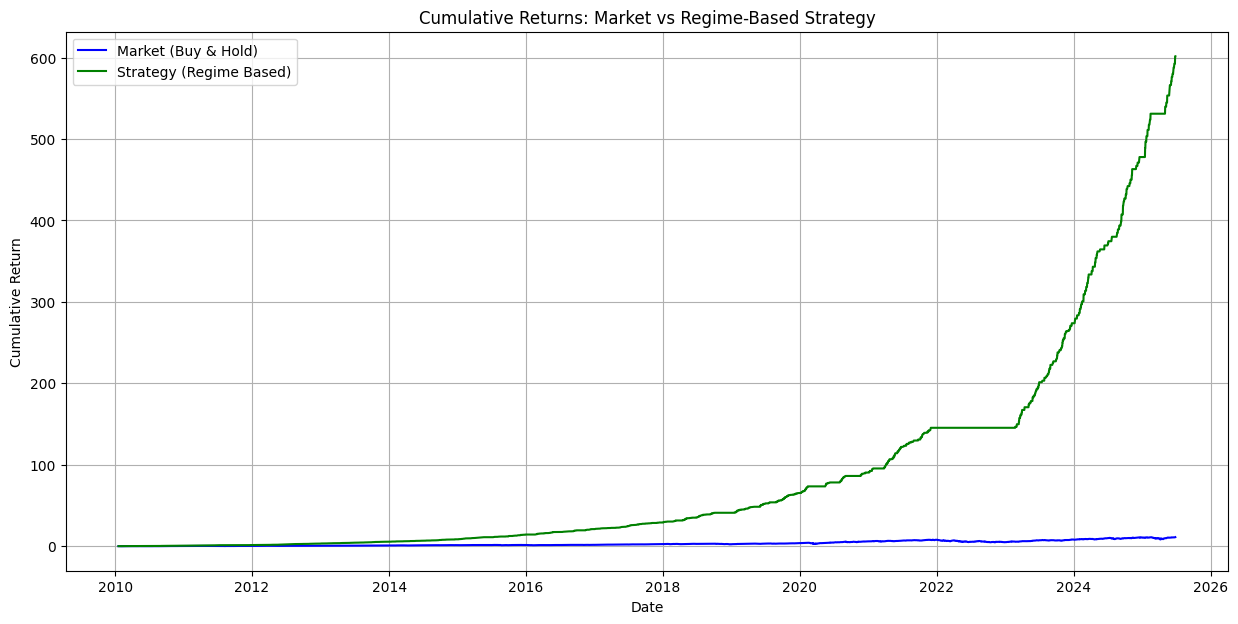

In [3]:
#load data w/ regimes
df_regimes = pd.read_csv("../data/es_futures_with_regimes.csv", index_col=0, parse_dates=True)

#plot regimes on price chart
plot_regimes(df_regimes, save_path="../outputs/regimes_plot.png")

#compute and print regime stats
stats_df = regime_statistics(df_regimes)

#map regime integers
regime_names = {
    0: "Trending",
    1: "Volatile",
    2: "Stable"
}
df_regimes['regime_name'] = df_regimes['regime'].map(regime_names)

#plot regime statistics summary
plot_regime_statistics(stats_df, save_path="../outputs/regime_stats.png")

#regime-based backtest. long only
long_regimes = [0]  #REMINDER TO FUTURE ME: CHANGE
df_bt = simple_regime_backtest(df_regimes, long_regimes)

#plot cumulative returns vs buy and hold
plot_strategy_vs_market(df_bt, save_path="../outputs/strategy_vs_market.png")
